<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 2.2.2

## Statistical Proof

### Part 1: Student's t-Test

The *t*-test is probably the most used statistical test. It measures the likelihood that a sample belongs to a given distribution, and incorporates a correction for the finite size of the sample.

#### Using the t-test to compare two means

Here, suppose we have two sets of measurements and we want to know if they both came from the same distribution.

For example, in [this](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data) dataset these could be age of house in one group and median value of house in another group, and we are testing the null hypothesis that there is no difference between the two groups.

#### Collect Data

You can find the original data [here](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data).

Data dictionary is available [here](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html).

In [4]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import pandas as pd

from scipy import stats
from matplotlib import pyplot as plt

%matplotlib inline

In [5]:
names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
data = pd.read_csv("/Users/tresornoel/Desktop/IOD/DATA/housing.data", header=None, names=names, delim_whitespace=True)

/var/folders/xg/jbqtrl9j5550jl9tl03n45dh0000gn/T/ipykernel_83636/589529244.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv("/Users/tresornoel/Desktop/IOD/DATA/housing.data", header=None, names=names, delim_whitespace=True)


In [6]:
# Head
data.head()


CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

In [7]:
# Shape
data.describe().T

count        mean         std        min         25%        50%  \
CRIM     506.0    3.613524    8.601545    0.00632    0.082045    0.25651   
ZN       506.0   11.363636   23.322453    0.00000    0.000000    0.00000   
INDUS    506.0   11.136779    6.860353    0.46000    5.190000    9.69000   
CHAS     506.0    0.069170    0.253994    0.00000    0.000000    0.00000   
NOX      506.0    0.554695    0.115878    0.38500    0.449000    0.53800   
RM       506.0    6.284634    0.702617    3.56100    5.885500    6.20850   
AGE      506.0   68.574901   28.148861    2.90000   45.025000   77.50000   
DIS      506.0    3.795043    2.105710    1.12960    2.100175    3.20745   
RAD      506.0    9.549407    8.707259    1.00000    4.000000    5.00000   
TAX      506.0  408.237154  168.537116  187.00000  279.000000  330.00000   
PTRATIO  506.0   18.455534    2.164946   12.60000   17.400000   19.05000   
B        506.0  356.674032   91.294864    0.32000  375.377500  391.44000   
LSTAT    506.0   12.653063    7.141062    1.73000    6.950000   11.36000   
MEDV     506.0   22.532806    9.197104    5.00000   17.025000   21.20000   

                75%       max  
CRIM       3.677083   88.9762  
ZN        12.500000  100.0000  
INDUS     18.100000   27.7400  
CHAS       0.000000    1.0000  
NOX        0.624000    0.8710  
RM         6.623500    8.7800  
AGE       94.075000  100.0000  
DIS        5.188425   12.1265  
RAD       24.000000   24.0000  
TAX      666.000000  711.0000  
PTRATIO   20.200000   22.0000  
B        396.225000  396.9000  
LSTAT     16.955000   37.9700  
MEDV      25.000000   50.0000

##### 1. Plot Histogram of `RM`

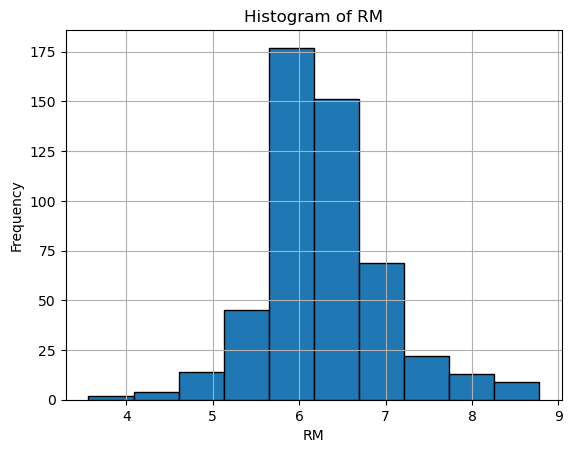

In [8]:
#  ANSWER
data['RM'].hist(bins = 10, edgecolor = 'black')
plt.xlabel('RM')
plt.ylabel('Frequency')
plt.title('Histogram of RM')
plt.show()

##### 2. Plot Histogram of `MEDV`

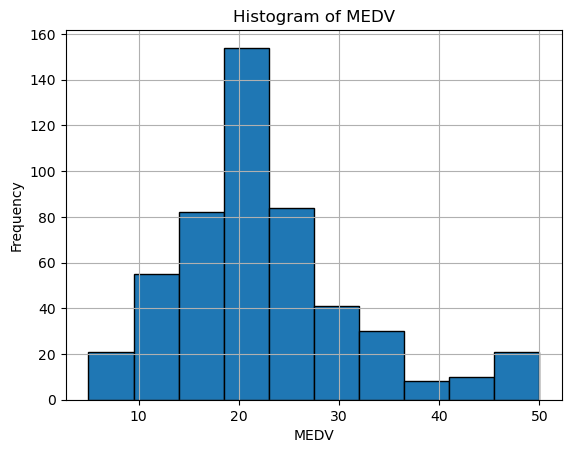

In [9]:
# ANSWER
data['MEDV'].hist(bins = 10, edgecolor = 'black')
plt.xlabel('MEDV')
plt.ylabel('Frequency')
plt.title('Histogram of MEDV')
plt.show()

##### 3.A Draw Scatter Plot of `RM` & `MEDV`

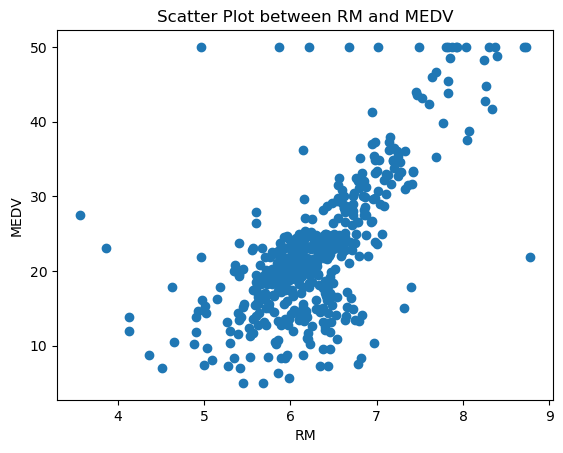

In [10]:
# ANSWER
plt.scatter(data['RM'], data['MEDV'])
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.title('Scatter Plot between RM and MEDV')
plt.show()

##### 3.B Is there any trend? State your observation.

**ANSWER:**: we can see from the scatter plot that most of dwellings have an average of 6 rooms and the median value of owner- occupied homes is around 20,000$

We'll be using following steps:

- Define hypothesis
- Set alpha (Let alpha = 0.05)
- Calculate point estimate
- Calculate test statistic
- Find the p-value
- Interpret results

##### 4. Define Hypothesis

Let's assume if `RM` of house is more than 6, it is a large house. Otherwise the house is small. Price of houses increases when the `RM` increases.

**ANSWER:**

    H0: There is no difference in the mean of prices between the large and small houses.
    H1: There is a difference in the mean of prices between the large and small houses.
    
**[Note]** _If you want you can explore the dataset and define different hypothesis._

##### 5. Set alpha (Let alpha = 0.05)

First, we should specify our criterion for statistical significance. Traditionally, we allow for no more than a 1-in-20 chance of a spurious rejection of the null hypothesis:

In [11]:
# ANSWER
alpha = 0.05

##### 6. Set Data

Now, let's create two sets of data
- Large House: Houses which have more than 6 rooms.
- Small House: Houses which have no more than 6 rooms.

Take sample of 100 houses in each dataset.

In [12]:
# ANSWER
N = 100
medv_over_6 = data[data['RM'] > 6]['MEDV'].sample(N, random_state=10)
medv_under_6 = data[data['RM'] <= 6]['MEDV'].sample(N, random_state=10)

# from scipy.stats import ttest_ind



# # Perform independent t-test
# t_stat, p_value = ttest_ind(medv_over_6, medv_under_6)

# print(f'T-statistic: {t_stat}')
# print(f'P-value: {p_value}')

# if p_value < 0.05:
#     print("Reject the null hypothesis - there is a significant difference between the groups")
# else:
#     print("Fail to reject the null hypothesis - no significant difference between the groups")

##### 6.A [BONUS] Build histogram for both `Large House` & `Small House`

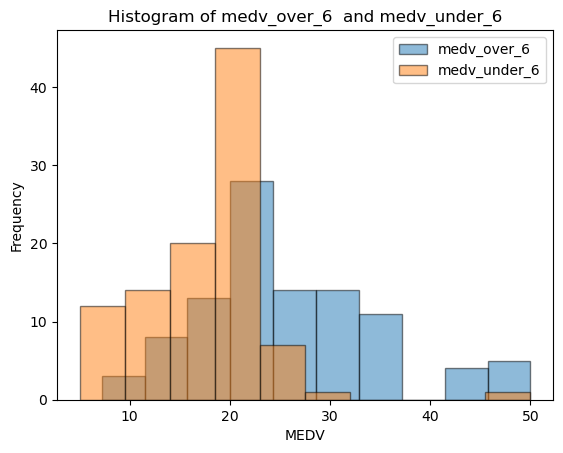

In [13]:
# ANSWER
plt.hist(medv_over_6,bins= 10, alpha = 0.5,edgecolor = 'black', label = 'medv_over_6')
plt.hist(medv_under_6,bins= 10, alpha = 0.5,edgecolor = 'black', label = 'medv_under_6')
plt.xlabel('MEDV')
plt.ylabel('Frequency')
plt.title('Histogram of medv_over_6  and medv_under_6')
plt.legend()
plt.show()

##### 7. Calculate Variance

Calculate variance for both samples.

In [14]:
# ANSWER
variance_medv_under_6 = np.var(medv_under_6, ddof = 1)
variance_medv_over_6  = np.var(medv_over_6, ddof = 1)
print(f'The variance of median value homes under 6 rooms is : {variance_medv_under_6}')
print(f'The variance of median value homes over 6 rooms is : {variance_medv_over_6}')

The variance of median value homes under 6 rooms is : 36.98191515151516
The variance of median value homes over 6 rooms is : 85.47239898989898


##### 8. Calculate Standard Deviation


Because we are dealing with two samples we need to compute the joint standard deviation.

Here sp is the pooled standard deviation for n = n1 = n2 and s^2
X1 and s^2 X2 are the unbiased estimators of the variances of the two samples.

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/f63e99c30c01445668ea2cce9832da0f6810cb4b)

In [15]:
# ANSWER
joint_variance = ((100 - 1) * variance_medv_under_6 + (100 - 1) * variance_medv_over_6) / (198)
joint_std_dev = np.sqrt(joint_variance)
print(f'joint Standard Deviation: {joint_std_dev}')

joint Standard Deviation: 7.8247784039362465


##### 9. Calculate test statistic

The *t*-statistic depends on the difference between the sample means and their joint standard deviation:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/070d365e1b347ea5f83f0147043868fa120b6646)


In [16]:
# ANSWER
mean_medv_under_6 = np.mean(medv_under_6)
mean_medv_over_6 = np.mean(medv_over_6)
# Calculate the test statistic
t_statistic = (mean_medv_under_6 - mean_medv_over_6) / (joint_std_dev * np.sqrt(1/100 + 1/100))

# Print the test statistic
print(f'Test Statistic (t): {t_statistic:.4f}')

Test Statistic (t): -7.5574


##### 10. Calculate Degree of Freedom

The number of degrees of freedom is the total number of samples (here, this is N from each set) minus the number of statistics in the computation (1 for each sample mean):

In [17]:
# ANSWER
degree_of_freedom = 2 * N -2
print(f'The degree of freedom is : {degree_of_freedom}')

The degree of freedom is : 198


##### 11. Find the p-value

Now we can compute the probability of the above *t*-statistic from the cumulative density function:

> stats.t.cdf

> p_value = 1 - cdf(t)

In [18]:
# 
# t_statistic_scalar = t_statistic.item() if isinstance(t_statistic, np.ndarray) else t_statistic
p_value = 2 * stats.t.cdf(-abs(t_statistic), data)
print(f'P-value: {p_value}')
# p = 1 - stats.t.cdf(abs(t_statistic_scalar), data)
# p_value = 2 * p  # Two-tailed p-value
# print(f'P-value: {p_value}')


P-value: [[9.67394136e-01 5.45831968e-07 1.12202495e-02 ... 2.87016878e-13
  6.54488042e-04 8.51202746e-08]
 [8.84234764e-01            nan 1.24425663e-04 ... 2.87016878e-13
  3.19401201e-05 1.68771846e-07]
 [8.84305410e-01            nan 1.24425663e-04 ... 2.92348911e-13
  1.59441798e-03 7.81565334e-09]
 ...
 [7.79847767e-01            nan 6.93652288e-06 ... 2.87016878e-13
  3.72694553e-04 8.74645487e-08]
 [6.60839541e-01            nan 6.93652288e-06 ... 2.91523750e-13
  1.92107615e-04 1.49837541e-07]
 [8.18614737e-01            nan 6.93652288e-06 ... 2.87016878e-13
  7.10662117e-05 7.04089157e-06]]


#### Interpret results

##### 12. Write a Function to Test Significance of `p_value`

Write a function which will take p_value and alpha as input. If p_value < alpha, print reject null hypothesis message. Otherwise print a fail to reject null hypothesis message.

In [19]:
# ANSWER
def test_significance(p_value, alpha):
    
    alpha = 0.05
    if p_value < alpha:
        print("Reject the null hypothesis: The means are significantly different.")
    else:
        print("Fail to reject the null hypothesis: The means are not significantly different.")

In [20]:
# ANSWER
def test_significance(p_value, alpha):
    
    alpha = 0.05
    if p_value < alpha:
        print("Reject the null hypothesis: The means are significantly different.")
    else:
        print("Fail to reject the null hypothesis: The means are not significantly different.")

In [21]:
# ANSWER

##### 13. [Bonus] Write a function to calculate t, p_value from two samples.

Calculate the T-test for the means of *two independent* samples of scores.

This is a two-sided test for the null hypothesis that 2 independent samples
have identical average (expected) values.

In [22]:
# ANSWER
def check_sig(p_value, alpha):
    '''
    Inputs:
    p_value: Calculated p_value
    alpha: Confidence level

    Returns:
    Significance message
    '''

    str_result = ''

    if p_value < alpha:
        str_result = "We reject our null hypothesis."
        str_result += '\n'
        str_result += null_hypothesis['H1']
    elif p_value > alpha:
        str_result = "We fail to reject our null hypothesis."
        str_result += '\n'
        str_result += null_hypothesis['H1']
    else:
        str_result = "Our test is inconclusive."

    return str_result

In [26]:
def ttest_ind(a, b, alpha=0.05):
    '''
    a, b: The arrays must have the same shape
    alpha: value of alpha
    '''
    N = len(a)

    # Calculate Variance
    var_a = a.var()
    var_b = b.var()

    # Calculate Standard Deviation
    std = np.sqrt((var_a + var_b) / 2)

    # Calculate t-stat
    t = (a.mean() - b.mean()) / (std * np.sqrt(2 / N))  # t-statistic

    # Calculate degree of freedom
    df = 2 * N - 2

    # Calculate p-value
    p = 1 - stats.t.cdf(abs(t), df=df)  # #p-value after comparison with the t
    # Two-tail
    p = p * 2

    return t, p, check_sig(p, alpha)

#### Use `Stats` Package

##### 14. Calculate the T-test for the means of *two independent* samples of scores

using following method of stats calculate the T-test for the means of two independent samples of scores.

> ttest_ind

In [11]:
# ANSWER
# # Perform independent t-test
t_stat, p_value = ttest_ind(medv_over_6, medv_under_6)

print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

if p_value < 0.05:
    print("Reject the null hypothesis - there is a significant difference between the groups")
else:
    print("Fail to reject the null hypothesis - no significant difference between the groups")

T-statistic: 7.557445982225259
P-value: 1.4921569681967713e-12
Reject the null hypothesis - there is a significant difference between the groups




---



---



> > > > > > > > > Â© 2024 Institute of Data


---



---



